# 병렬 체인 (Parallel Chains)
- 여러 체인을 동시에 실행하여 다양한 관점의 답변을 얻을 수 있습니다.

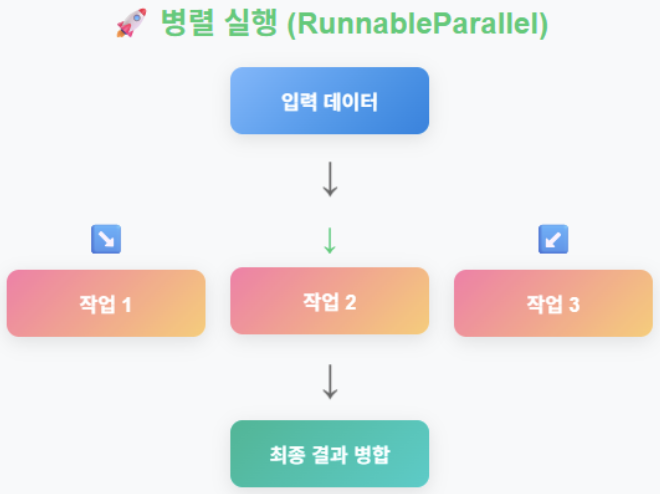

# Model

## [OpenAI API Key 발급](https://platform.openai.com/api-keys)

In [21]:
from dotenv import load_dotenv

# 환경변수 로드
load_dotenv()

True

In [22]:
import os 

# API 키 확인
api_key = os.getenv("OPENAI_API_KEY")
if api_key:
    print("OpenAI API 키가 설정되었습니다. (GPT 모델 사용)")
else:
    print("OpenAI API 키가 없습니다.")

OpenAI API 키가 설정되었습니다. (GPT 모델 사용)


## ChatOpenAI

In [23]:
from langchain_openai import ChatOpenAI

model = ChatOpenAI(
    model="gpt-5-nano",
    reasoning_effort="high",        # 논리성 강화
)

# Parser

In [24]:
from langchain_core.output_parsers import StrOutputParser

# OutputParser 설정
output_parser = StrOutputParser()

# 장점을 답변하는 체인 생성하기

In [25]:
from langchain.prompts import PromptTemplate

pros_prompt = PromptTemplate(
    input_variables=["topic"],
    template="{topic}의 장점들을 나열해주세요."
)

In [27]:
pros_chain = pros_prompt | model | output_parser

In [28]:
pros_chain

PromptTemplate(input_variables=['topic'], input_types={}, partial_variables={}, template='{topic}의 장점들을 나열해주세요.')
| ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x000001C01EA3AA50>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x000001C01EA3AF90>, root_client=<openai.OpenAI object at 0x000001C01EA386E0>, root_async_client=<openai.AsyncOpenAI object at 0x000001C01EA3ABA0>, model_name='gpt-5-nano', model_kwargs={}, openai_api_key=SecretStr('**********'), reasoning_effort='high')
| StrOutputParser()

# 단점을 답변하는 체인 생성하기

In [29]:
cons_prompt = PromptTemplate(
    input_variables=["topic"],
    template="{topic}의 단점들을 나열해주세요."
)

In [30]:
cons_chain = cons_prompt | model | output_parser

In [31]:
cons_chain

PromptTemplate(input_variables=['topic'], input_types={}, partial_variables={}, template='{topic}의 단점들을 나열해주세요.')
| ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x000001C01EA3AA50>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x000001C01EA3AF90>, root_client=<openai.OpenAI object at 0x000001C01EA386E0>, root_async_client=<openai.AsyncOpenAI object at 0x000001C01EA3ABA0>, model_name='gpt-5-nano', model_kwargs={}, openai_api_key=SecretStr('**********'), reasoning_effort='high')
| StrOutputParser()

# 전반적인 요약을 답변하는 체인 생성하기

In [32]:
summary_prompt = PromptTemplate(
    input_variables=["topic"],
    template="{topic}에 대한 전반적인 요약을 해주세요."
)

In [33]:
summary_chain = summary_prompt | model | output_parser

In [34]:
summary_chain

PromptTemplate(input_variables=['topic'], input_types={}, partial_variables={}, template='{topic}에 대한 전반적인 요약을 해주세요.')
| ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x000001C01EA3AA50>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x000001C01EA3AF90>, root_client=<openai.OpenAI object at 0x000001C01EA386E0>, root_async_client=<openai.AsyncOpenAI object at 0x000001C01EA3ABA0>, model_name='gpt-5-nano', model_kwargs={}, openai_api_key=SecretStr('**********'), reasoning_effort='high')
| StrOutputParser()

# RunnableParallel 체인 생성하기 

In [35]:
from langchain_core.runnables import RunnableParallel

In [36]:
# 병렬 체인 생성
parallel_chain = RunnableParallel({
    "pros": pros_chain,
    "cons": cons_chain,
    "summary": summary_chain
})



In [37]:
# 병렬 실행
results = parallel_chain.invoke({"topic": "원격근무"})

In [38]:
results.keys()

dict_keys(['pros', 'cons', 'summary'])

In [39]:
print("=== 장점 ===")
print(results["pros"])

=== 장점 ===
다음은 일반적으로 보고되는 원격근무의 장점들입니다.

- 출퇴근 시간 및 교통비 절감
- 일정의 유연성 증가로 삶의 질 개선
- 일과 삶의 균형 개선
- 집중력과 생산성 향상 가능
- 자율성 증가와 자기관리 강화
- 더 넓은 인재풀 확보 및 포용성 확대
- 사무실 운영비 및 자원 비용의 절감
- 협업 도구를 통한 효율적 협업 및 커뮤니케이션
- 환경적 이점: 탄소 배출 감소 등
- 위기 상황에서도 사업 연속성 및 회복력 강화
- 글로벌 협업 가능성과 시차 활용
- 기업 이미지와 채용 매력도 증가
- 직원 만족도 증가 및 조직 충성도 향상

참고로 개인 및 조직의 상황에 따라 체감되는 효과는 다를 수 있습니다.


In [40]:
print("\n=== 단점 ===")
print(results["cons"])


=== 단점 ===
다음은 원격근무의 일반적인 단점들입니다.

- 개인 차원
  - 사회적 고립감 및 소속감 저하: 동료와의 비대면 교류가 줄어 팀 분위기가 약해질 수 있습니다.
  - 워크-라이프 경계 모호 및 과로: 업무와 개인 생활의 경계가 흐려져 초과근무가 늘어날 수 있습니다.
  - 건강 문제: 장시간 앉아 있음으로 인한 자세 문제, 수면 질 저하, 눈 피로 등이 생길 수 있습니다.
  - 집중 방해 및 가정 환경: 가족 돌봄, 아이 돌봄, 소음 등으로 집중이 어려울 수 있습니다.
  - 경력 관리의 불안: 승진 기회가 눈에 덜 띄고 피드백이 잘 보이지 않을 수 있습니다.

- 팀/조직 차원
  - 커뮤니케이션 한계 및 맥락 손실: 비대면으로 인해 오해나 중요한 맥락 누락이 생길 수 있습니다.
  - 협업의 어려움 및 의사결정 지연: 실시간 협업이 줄고 의사결정 속도가 느려질 수 있습니다.
  - 신입 온보딩 및 문화 형성의 어려움: 신규 직원의 팀 문화 적응이 더 어려울 수 있습니다.
  - 피드백 전달의 비효율성 및 공정성 문제: 피드백이 전달되기까지 시간이 걸리거나 형평성이 떨어질 수 있습니다.

- 기술/보안/비용
  - 보안 위험 증가: 가정용 네트워크나 개인 기기 사용으로 데이터 보안 취약점이 커질 수 있습니다.
  - 비용 부담 및 장비 관리: 홈오피스 구축 비용, 인터넷 비용, IT 지원 부담이 증가할 수 있습니다.
  - 기술 의존성 및 장애 시 업무 마비 위험: 인터넷이나 시스템 장애가 전체 업무에 큰 영향을 줄 수 있습니다.

- 시차/환경 차이
  - 시차로 인한 협업 불편: 서로 다른 시간대에 근무하는 팀원과의 실시간 소통이 어려울 수 있습니다.
  - 작업환경 격차로 인한 생산성 차이: 주거 환경에 따라 작업효율이 달라질 수 있습니다.

상황에 따라 심각도가 달라지므로 필요하시면 특정 직무나 조직문화에 맞춘 단점과 대처 방안도 함께 정리해드리겠습니다.


In [41]:
print("\n=== 요약 ===")
print(results["summary"])


=== 요약 ===
다음은 원격근무에 대한 전반적인 요약입니다.

정의 및 형태
- 정의: 직원이 사무실이 아닌 장소에서 디지털 도구를 활용해 업무를 수행하는 근무 방식.
- 형태의 다양성: 완전 원격(사무실 없이 일함), 하이브리드(일부는 사무실, 일부는 원격), 글로벌/다국가 팀, 디지털 노마딩(위치에 구애받지 않는 근무), 비동기 커뮤니케이션의 활용 등으로 구분됩니다.

이점
- 생산성 및 만족도: 출퇴근 시간 감소와 유연한 근무환경이 직무 만족도와 집중력을 높일 수 있습니다.
- 비용 절감: 사무실 공간 비용, 교통비 등 운영비용이 감소할 수 있습니다.
- 인재 채용의 확장성: 지리적 제약이 낮아 다양한 인재를 채용할 수 있습니다.
- 환경적 영향: 교통으로 인한 탄소배출 감소 등 환경효과가 있습니다.

도전과제
- 커뮤니케이션 및 협업의 어려움: 실시간 소통이 어려워지거나 의사소통이 비효율적일 수 있습니다.
- 소속감/조직문화: 물리적 공간이 축소되면서 팀 문화와 소속감이 약화될 수 있습니다.
- 시간대 차이와 비동기 운영: 국제팀의 경우 응답 시간 및 일정 조정이 필요합니다.
- 관리의 어려움: Leistung(성과) 중심의 관리 체계가 필요하며, 활동 기반 관리보다 결과 중심으로의 전환이 필요할 수 있습니다.
- 번아웃 및 경계 설정: 업무와 개인 생활의 경계가 흐려질 위험이 있습니다.
- 보안/IT 인프라: 보안 위협 증가와 기술 지원의 필요성이 커집니다.
- 법적·세무·보험 이슈: 국경 간 고용 시 규정 차이가 문제될 수 있습니다.

성공 요소
- 명확한 정책과 기대치: 근무시간, 응답시간, 산출물 등 정책을 명확히 설정합니다.
- 신뢰 기반의 문화: 지속적 피드백과 투명한 커뮤니케이션으로 신뢰를 쌓습니다.
- 성과 기반 관리: OKR/ KPI 등 결과물 중심으로 성과를 측정합니다.
- 올바른 도구와 인프라: 협업툴, 프로젝트 관리도구, 커뮤니케이션 도구, 보안 인프라를 갖춥니다.
- 보안 및 규정 준수: VPN/MFA 등 보안 정책과 직원 